## Chargement et préparation des données

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

# Détection du bon chemin vers le fichier CSV
import os

path = kagglehub.dataset_download("abcsds/pokemon")
df = pd.read_csv(f"{path}/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Analyse descriptive des données

In [22]:
print('Dimensions du dataset :', df.shape)
print('Colonnes disponibles :', list(df.columns))
print('\nInformations sur les colonnes :')
print(df.info())

Dimensions du dataset : (800, 13)
Colonnes disponibles : ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']

Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [23]:
# Valeurs manquantes
df.isna().sum().sort_values(ascending=False)

Type 2        386
#               0
Name            0
Type 1          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [24]:
# Statistiques descriptives pour les colonnes numériques
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [25]:
# Aperçu des colonnes de type
cols_type = [c for c in df.columns if 'type' in c.lower()]
for c in cols_type:
    print(f'\n{c}: {df[c].nunique()} catégories')
    print(df[c].unique()[:10])


Type 1: 18 catégories
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting']

Type 2: 18 catégories
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel']


In [26]:
# Répartition de la colonne Legendary si elle existe
if 'Legendary' in df.columns:
    print(df['Legendary'].value_counts(dropna=False))
else:
    print('Aucune colonne Legendary trouvée.')

Legendary
False    735
True      65
Name: count, dtype: int64


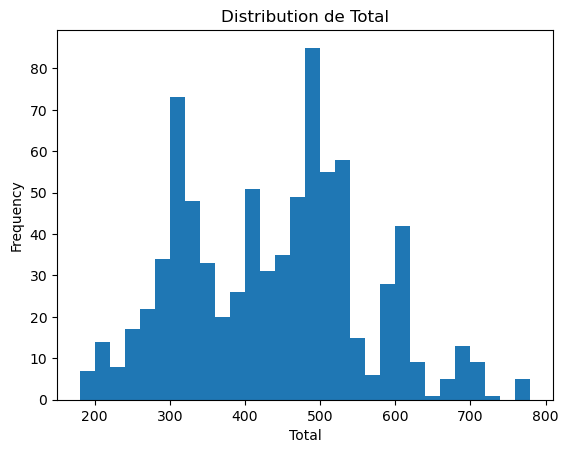

In [27]:
# Visualisation simple : distribution de la colonne Total
if 'Total' in df.columns:
    df['Total'].plot(kind='hist', bins=30, title='Distribution de Total')
    plt.xlabel('Total')
    plt.show()
else:
    print('Pas de colonne Total.')

## Prétraitement des données

Nous allons :
- Créer `Type 1` et `Type 2` si une seule colonne `Type` existe.
- Harmoniser la casse (majuscules/minuscules).
- Remplacer les valeurs manquantes.
- S’assurer que `Legendary` soit booléenne.

In [28]:
# Si une seule colonne Type existe, on la sépare en Type 1 et Type 2
type_col = [c for c in df.columns if c.lower() == 'type']
if type_col:
    col = type_col[0]
    temp = df[col].astype(str).str.replace('[,/\\-]', ' ', regex=True)
    df['Type 1'] = temp.str.split().str[0]
    df['Type 2'] = temp.str.split().str[1]

# Normaliser la casse
for c in ['Type 1', 'Type 2']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.title().replace('Nan', np.nan)

# Remplir les valeurs manquantes de Type 2
if 'Type 2' in df.columns:
    df['Type 2'] = df['Type 2'].fillna('Aucun')

# Conversion de Legendary en booléen si nécessaire
if 'Legendary' in df.columns:
    df['Legendary'] = df['Legendary'].astype(str).str.lower().map({'true': True, 'false': False})
    df['Legendary'] = df['Legendary'].fillna(False)

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Aucun,309,39,52,43,60,50,65,1,False


## Formalisation du problème

Nous allons modéliser le problème comme une **classification binaire** : prédire si un Pokémon est **Légendaire** ou non.

**Variable cible** : `Legendary`

**Variables explicatives possibles** :
- Numériques : `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, `Total`
- Catégorielles : `Type 1`, `Type 2`, `Generation`


In [29]:
features_num = [c for c in ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Total'] if c in df.columns]
features_cat = [c for c in ['Type 1','Type 2','Generation'] if c in df.columns]

target = 'Legendary'
features = features_num + features_cat
print('Caractéristiques utilisées :', features)
df[features + [target]].head()

Caractéristiques utilisées : ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Type 1', 'Type 2', 'Generation']


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,Type 1,Type 2,Generation,Legendary
0,45,49,49,65,65,45,318,Grass,Poison,1,False
1,60,62,63,80,80,60,405,Grass,Poison,1,False
2,80,82,83,100,100,80,525,Grass,Poison,1,False
3,80,100,123,122,120,80,625,Grass,Poison,1,False
4,39,52,43,60,50,65,309,Fire,Aucun,1,False


## Modèle de base : Régression logistique

On construit un pipeline de classification avec :
1. Normalisation des variables numériques
2. Encodage des variables catégorielles (one-hot)
3. Modèle : **Régression logistique**


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

X = df[features]
y = df[target].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), features_num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), features_cat)
])

model = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]

print('Exactitude :', accuracy_score(y_test, pred))
print('AUC :', roc_auc_score(y_test, proba))
print('\nRapport de classification :\n', classification_report(y_test, pred))
print('\nMatrice de confusion :\n', confusion_matrix(y_test, pred))

Exactitude : 0.925
AUC : 0.9408686551543695

Rapport de classification :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       147
           1       0.56      0.38      0.45        13

    accuracy                           0.93       160
   macro avg       0.75      0.68      0.71       160
weighted avg       0.92      0.93      0.92       160


Matrice de confusion :
 [[143   4]
 [  8   5]]


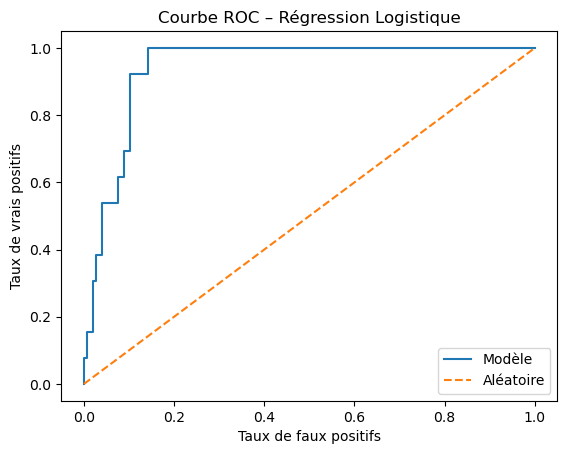

In [31]:
# Tracé de la courbe ROC
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.plot(fpr, tpr, label='Modèle')
plt.plot([0,1],[0,1],'--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC – Régression Logistique')
plt.legend()
plt.show()